Funcion de Transferencia del Low-Pass

In [32]:
import sympy as ss
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
%matplotlib qt

In [33]:
# Definición de símbolos
wo, Q = ss.symbols(r'\omega_o Q')
Ga1, Ga2, Gb, G21, G22, G3 = ss.symbols('G_{a1} G_{a2} G_b G_{21} G_{22} G_3', positive=True)
C1,C41, C42 = ss.symbols('C1 C_{41} C_{42}', positive=True)
R3, Ra1, Ra2, Rb, R21, R22 = ss.symbols('R_3 R_{a1} R_{a2} R_b R_{21} R_{22}', positive=True)
n2_sym, n0_sym, s = ss.symbols('n_2 n_0 s')
T, wz = ss.symbols(r'T \omega_z')
Q_sym, wo_sym = ss.symbols(r'Q w_o')

# Conductancias a resistencias
reemplazo = {
    G21 : 1 / R21, G22 : 1/ R22, G3 : 1/R3,
    Ga1: 1 / Ra1, Ga2: 1 / Ra2, Gb: 1 / Rb
}

# Transferencia simbólica
T_expr = (n2_sym*(s**2 + wz**2))/(s**2 + s*(wo_sym/Q_sym) + wo_sym**2)
display(Math("T(s) = " + latex(T_expr)))

# wz = sqrt(n0/n2)
T_mod = T_expr.subs(wz, ss.sqrt(n0_sym/n2_sym))
display(Math("T(s) = " + latex(T_mod)))

# Definición de n2 y n0 (como expresiones nuevas)
n2_expr = ((Ga1+Ga2+Gb)/Gb)*(C42/(C41+C42))-(Ga2/Gb)
n0_expr = (G3*(G21+G22)/(C1*(C41+C42)))*((G22/(G21+G22))*((Ga1+Ga2+Gb)/Gb)-(Ga2/Gb))
wo_expr = ss.sqrt(G3*(G21+G22)/(C1*(C41 +C42)))
Q_expr = ss.sqrt(G3*(G21+G22)/(C1*(C41 +C42))) *(1/( ((G21+G22+G3)/C1)-(G3/(C41+C42))*((Ga1+Ga2)/Gb) ))

# Reemplazar conductancias por resistencias
n2_res = n2_expr.subs(reemplazo).simplify()
n0_res = n0_expr.subs(reemplazo).simplify()
wo_res = wo_expr.subs(reemplazo).simplify()
Q_res   = Q_expr.subs(reemplazo).simplify()

# Sustituir en T
T_mod2 = T_mod.subs({
    n2_sym: n2_res,
    n0_sym: n0_res,
    wo_sym: wo_res,
    Q_sym: Q_res
})

# Mostrar resultados
display(Math("n_2 = " + latex(n2_res)))
display(Math("n_0 = " + latex(n0_res)))
display(Math("w_o = " + latex(wo_res)))
display(Math("Q = " + latex(Q_res)))
display(Math("T(s) = " + latex(T_mod2)))

w = ss.symbols(r'w')
j = ss.I  # Unidad imaginaria

# Sustituir s = j*w
T_jw = T_mod2.subs(s, j*w)
display(Math("T(jw) = " + latex(T_jw)))

# Calculo en dB
T_mod = ss.Abs(T_jw)
display(Math(r"|T(jw)| = " + latex(T_mod)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
valores = {
    R3: 935,
    Ra1: 4.96e3,
    Ra2: 58.2e3,
    Rb: 100,
    R21: 1.3e3,
    R22: 3.3e3,
    C1: 372e-9,
    C41: 10e-9,
    C42: 330e-12
}

T_mod_num = T_mod.evalf(subs=valores)
display(Math(r"|T(jw)| = " + latex(T_mod_num)))

<IPython.core.display.Math object>

Obtengo polos, ceros y ganancia

In [35]:
n2_num = n2_res.evalf(subs=valores)
n0_num = n0_res.evalf(subs=valores)
wo_num = wo_res.evalf(subs=valores)
Q_num = Q_res.evalf(subs=valores)
wz = ss.sqrt( (n0_num/n2_num))
Gain = n0_num/(wo_num)**2
Gain_db = 20 * np.log10(float(Gain))


import math
twopi = 2*math.pi
fo= wo_num/twopi
fz = wz/twopi

display(Math(r"f_o = " + latex(fo)))
display(Math(r"f_z = " + latex(fz)) )
display(Math(r"Q = " + latex(Q_num)))
display(Math(r"Gain(dB) = " + latex(Gain_db) + r"\ dB") )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

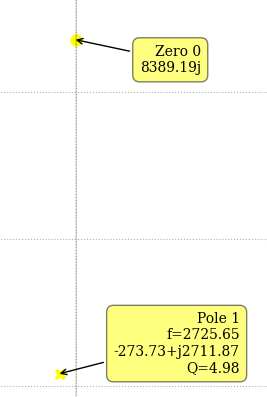

In [36]:
f = ss.symbols('f')
T_mod_grap = 0.0309265339034133 * ss.Abs(((twopi*f)**2 - 2770180113.50676) / (-(twopi*f)**2 + 3492.17357916022*ss.I*(twopi*f) + 298432190.883823))

fa_m = 727.27     # fa-
fp_m = 2.16e3     # fp-
fo   = 2.4e3    # fo
fp_p = 2.667e3    # fp+
fa_p = 7.92e3   # fa+

# Convertimos a función numérica evaluable
T_mod_func = ss.lambdify(f, T_mod_grap, modules='numpy')

frecs = [fa_m, fp_m, fo, fp_p, fa_p]
dB_vals = 20 * np.log10(np.abs(T_mod_func(np.array(frecs))))

# Dominio de frecuencias
w_vals = np.linspace(1, 100e3, 10000)

# Evaluación y conversión a decibeles
T_vals = T_mod_func(w_vals)
T_db = 20 * np.log10(np.abs(T_vals))

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(w_vals, T_db)

# Marcar frecuencias
for f, db in zip(frecs, dB_vals):
    plt.plot(f, db, 'ro')  # punto rojo
    plt.annotate(f'{db:.2f} dB', xy=(f, db), xytext=(5, 5),
                 textcoords='offset points', color='red', fontsize=9)

plt.title(r'$20 \log_{10}(|T(j2\pi f)|)$')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
plt.tight_layout()
plt.xscale('log')
plt.grid(True, which='both', linestyle='--')  
plt.minorticks_on()                          
plt.show()

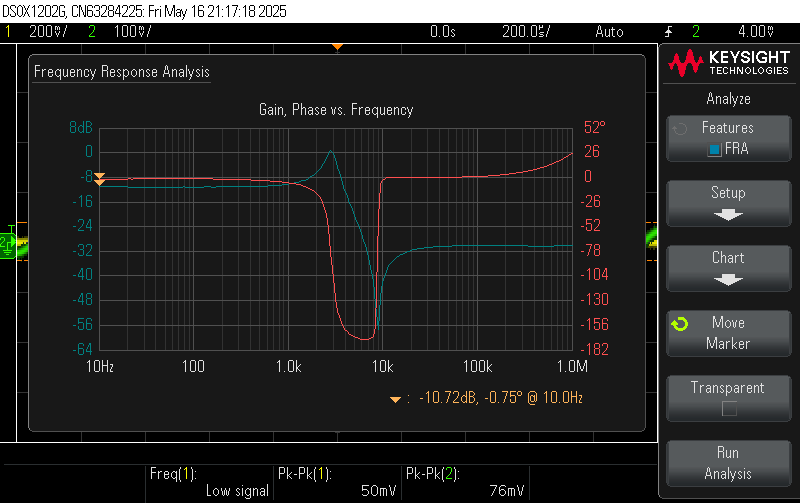